In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

In [2]:
def init(env):
    """
    env: OpenAI Gym Environment
    """
    Q = np.zeros((env.nS, env.nA))
    return Q

In [3]:
def policy(env, state, Q, epsilon):
    if np.random.rand() < epsilon: # epsilon-greedy policy
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

In [11]:
episodes = 10000
epsilon = 0.2
alpha = 0.2
discount = 0.9
n = 4

env = FrozenLakeEnv()
Q = init(env)        

In [12]:
# This is a model free algo so learn while moving
episode_rewards = []
for e in range(episodes):
    s0 = env.reset()
    a0 = policy(env, s0, Q, epsilon)
    t = 0
    T = float('inf') # A very large number
    states = [s0]
    actions = [a0]
    rewards = []
    
    while True:
        if t < T:
            state, reward, done, _ = env.step(actions[t])
            rewards.append(reward)
            states.append(state)
            if done:
                T = t+1
            else:
                actions.append(policy(env, state, Q, epsilon))
        r = t - n + 1
        if r >= 0:
            upper = min(r+n, T)
            G = 0.
            for i in range(r+1, upper):
                G += discount**(i-r-1) * rewards[i]
            if r+n < T: # Not terminal
                G += discount**n * Q[states[r+n], actions[r+n]]
            Q[states[r], actions[r]] += alpha*(G-Q[states[r], actions[r]])
        if r == T-1:
            break
        t += 1
    episode_rewards.append(sum(rewards))

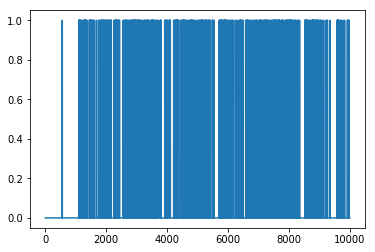

In [13]:
plt.plot(episode_rewards)